In [30]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from kaggle.api.kaggle_api_extended import KaggleApi

In [36]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

In [20]:
# Authenticate with Kaggle API
api = KaggleApi()
api.authenticate()


In [21]:
# Download the dataset from Kaggle
api.dataset_download_files('arjunbhasin2013/ccdata', unzip=True)

In [22]:
# Load the dataset into a Pandas dataframe
df = pd.read_csv('CC GENERAL.csv')

In [23]:
# Load the dataset into a Pandas dataframe
df = pd.read_csv('CC GENERAL.csv')

# Print the first five rows of the dataset
print(df.head())


  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

In [24]:
# Data preprocessing
df = df.drop(['CUST_ID'], axis=1)
df = df.dropna()
df = df.apply(pd.to_numeric, errors='coerce')
df = df.fillna(0)

In [25]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [31]:
# Density-based clustering using DBSCAN algorithm
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(df_scaled)

DBSCAN()

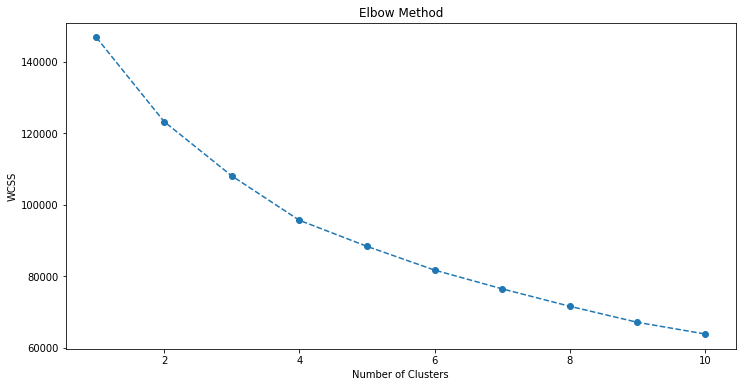

In [32]:
# Determine the optimal number of clusters using elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [37]:
# Model-based clustering using Gaussian Mixture Model algorithm
gmm = GaussianMixture(n_components=2)
gmm.fit(df_scaled)

GaussianMixture(n_components=2)

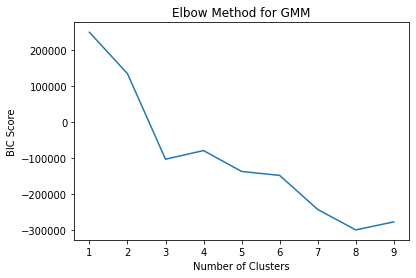

In [40]:
# Elbow method for model-based clustering using GMM
n_clusters = range(1, 10)
gmm_scores = []
for n in n_clusters:
    gmm = GaussianMixture(n_components=n)
    gmm.fit(df_scaled)
    gmm_scores.append(gmm.bic(df_scaled))
    
plt.plot(n_clusters, gmm_scores)
plt.title('Elbow Method for GMM')
plt.xlabel('Number of Clusters')
plt.ylabel('BIC Score')
plt.show()


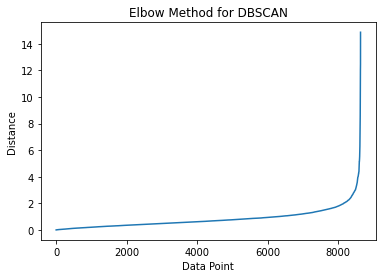

In [41]:
# Elbow method for density-based clustering using DBSCAN
from sklearn.neighbors import NearestNeighbors
import numpy as np

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df_scaled)
distances, indices = nbrs.kneighbors(df_scaled)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.title('Elbow Method for DBSCAN')
plt.xlabel('Data Point')
plt.ylabel('Distance')
plt.show()


In [38]:
# Adding cluster labels to the dataframe
df['cluster'] = gmm.predict(df_scaled)

In [33]:
# Adding cluster labels to the dataframe
df['cluster'] = dbscan.labels_

In [28]:
# Adding cluster labels to the dataframe
df['cluster'] = kmeans.labels_

In [27]:
# Fitting the K-Means algorithm to the dataset
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(df_scaled)

KMeans(n_clusters=3, random_state=42)

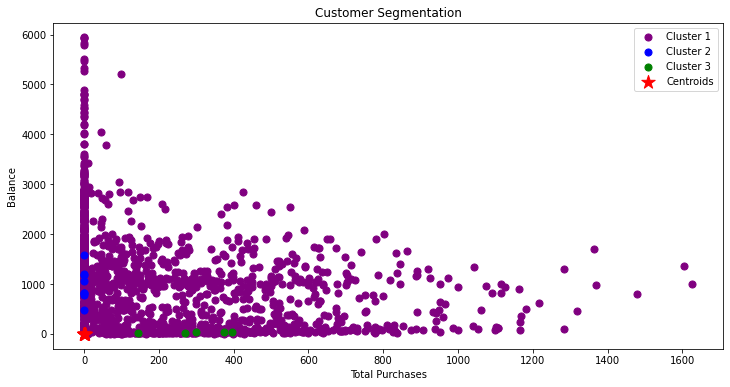

In [34]:
# Visualize the clusters
plt.figure(figsize=(12,6))
plt.scatter(df['PURCHASES'][df.cluster == 0], df['BALANCE'][df.cluster == 0], s=50, c='purple', label='Cluster 1')
plt.scatter(df['PURCHASES'][df.cluster == 1], df['BALANCE'][df.cluster == 1], s=50, c='blue', label='Cluster 2')
plt.scatter(df['PURCHASES'][df.cluster == 2], df['BALANCE'][df.cluster == 2], s=50, c='green', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, marker='*', c='red', label='Centroids')
plt.title('Customer Segmentation')
plt.xlabel('Total Purchases')
plt.ylabel('Balance')
plt.legend()
plt.show()

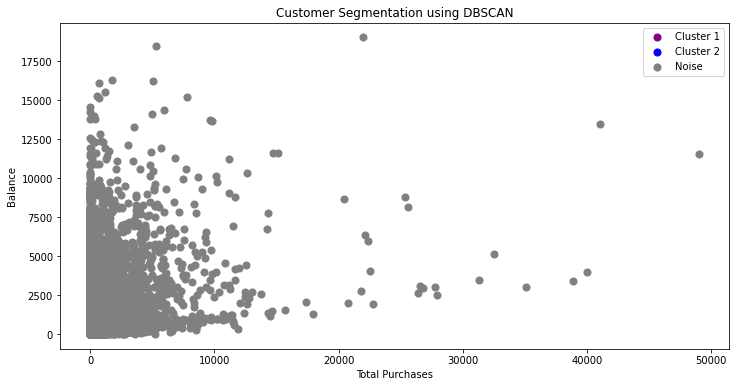

In [35]:
# Visualize the clusters
plt.figure(figsize=(12,6))
plt.scatter(df['PURCHASES'][df.cluster == 0], df['BALANCE'][df.cluster == 0], s=50, c='purple', label='Cluster 1')
plt.scatter(df['PURCHASES'][df.cluster == 1], df['BALANCE'][df.cluster == 1], s=50, c='blue', label='Cluster 2')
plt.scatter(df['PURCHASES'][df.cluster == -1], df['BALANCE'][df.cluster == -1], s=50, c='gray', label='Noise')
plt.title('Customer Segmentation using DBSCAN')
plt.xlabel('Total Purchases')
plt.ylabel('Balance')
plt.legend()
plt.show()


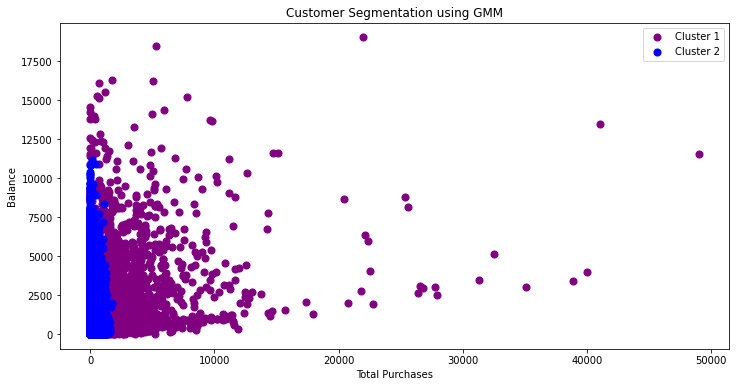

In [39]:
# Visualize the clusters
plt.figure(figsize=(12,6))
plt.scatter(df['PURCHASES'][df.cluster == 0], df['BALANCE'][df.cluster == 0], s=50, c='purple', label='Cluster 1')
plt.scatter(df['PURCHASES'][df.cluster == 1], df['BALANCE'][df.cluster == 1], s=50, c='blue', label='Cluster 2')
plt.title('Customer Segmentation using GMM')
plt.xlabel('Total Purchases')
plt.ylabel('Balance')
plt.legend()
plt.show()